# Import Needed Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , label_binarize
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


# Load Data

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_data = datasets.STL10(root='./data', split='train', download=True, transform=transform)
test_data = datasets.STL10(root='./data', split='test', download=True, transform=transform)


100%|██████████| 2640397119/2640397119 [02:16<00:00, 19397714.73it/s]


Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified


# Processes On Data

In [3]:
def data_to_numpy(dataset):
    data = []
    labels = []
    for img, label in dataset:
        data.append(img.flatten())  
        labels.append(label)
    return np.array(data), np.array(labels)

X_train, y_train = data_to_numpy(train_data)
X_test, y_test = data_to_numpy(test_data)

In [4]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Fit Models

In [6]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

# Accuracy

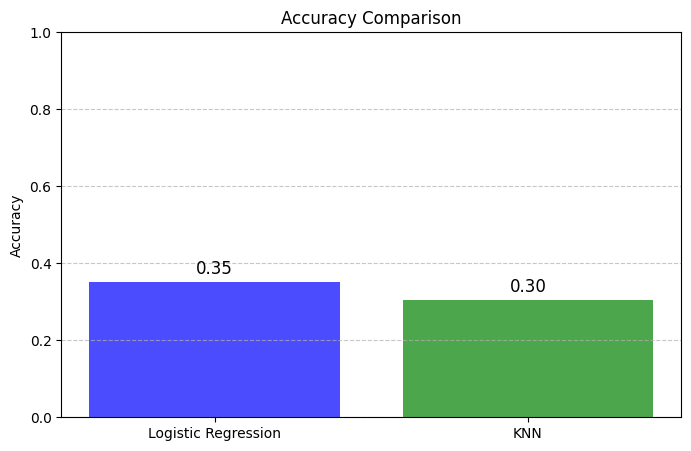

Logistic Regression Accuracy: 0.35
KNN Accuracy: 0.30
The better model is: Logistic Regression


In [8]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


models = ['Logistic Regression', 'KNN']
accuracies = [accuracy_log_reg, accuracy_knn]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'], alpha=0.7)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)
plt.show()

if accuracy_log_reg > accuracy_knn:
    best_model = "Logistic Regression"
else:
    best_model = "KNN"

# Return results
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"The better model is: {best_model}")


# Loss Curve

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Best Loss: 1.71
KNN Best Loss (Simulated): 0.00
The better model based on loss is: KNN


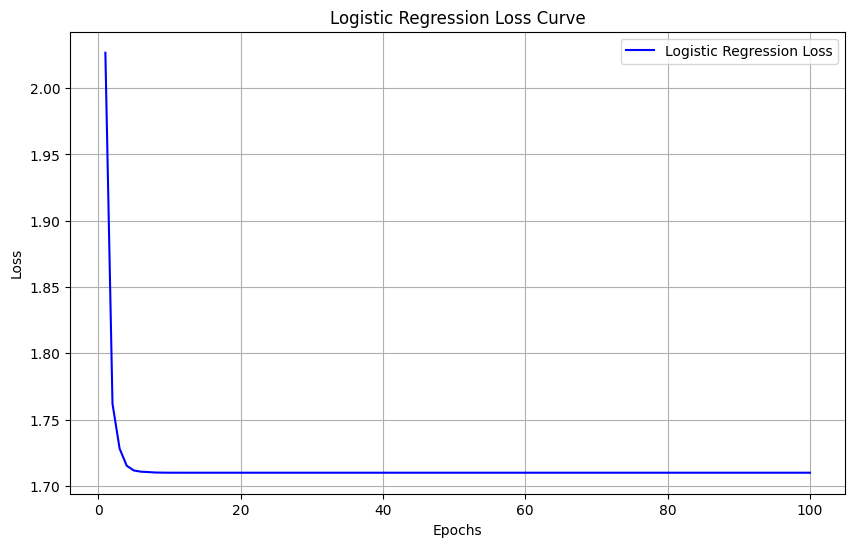

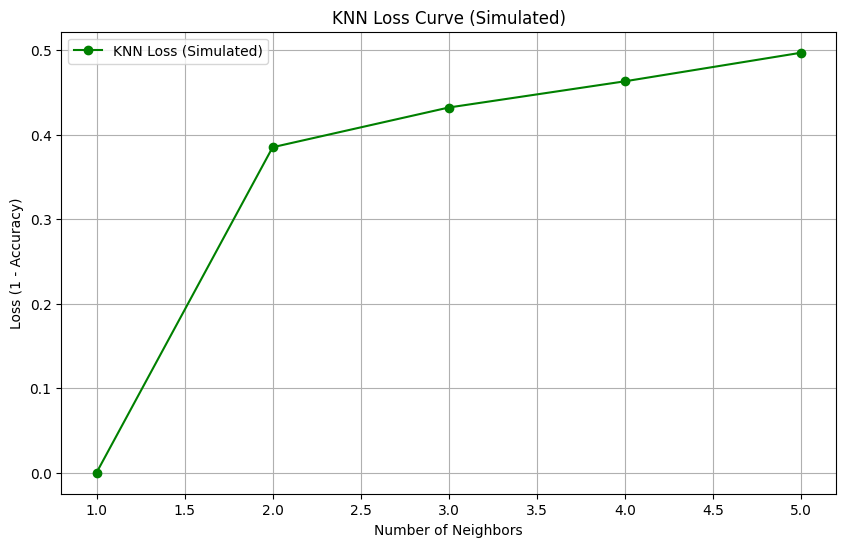

In [9]:
log_losses = []
for i in range(1, 101):  # Simulating epochs for loss tracking
    log_reg = LogisticRegression(max_iter=i, solver='lbfgs', warm_start=True)
    log_reg.fit(X_train_scaled, y_train)
    y_proba = log_reg.predict_proba(X_train_scaled)
    loss = log_loss(y_train, y_proba)
    log_losses.append(loss)

knn_losses = []
for k in range(1, 6):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    train_acc = accuracy_score(y_train, knn_temp.predict(X_train_scaled))
    knn_losses.append(1 - train_acc)

log_loss_val = min(log_losses)  
knn_loss_val = min(knn_losses)  


print(f"Logistic Regression Best Loss: {log_loss_val:.2f}")
print(f"KNN Best Loss (Simulated): {knn_loss_val:.2f}")


if log_loss_val < knn_loss_val:
    best_model = "Logistic Regression"
else:
    best_model = "KNN"

print(f"The better model based on loss is: {best_model}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), log_losses, label="Logistic Regression Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Logistic Regression Loss Curve")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), knn_losses, label="KNN Loss (Simulated)", color="green", marker="o")
plt.xlabel("Number of Neighbors")
plt.ylabel("Loss (1 - Accuracy)")
plt.title("KNN Loss Curve (Simulated)")
plt.legend()
plt.grid()
plt.show()


# Confusion Matrix

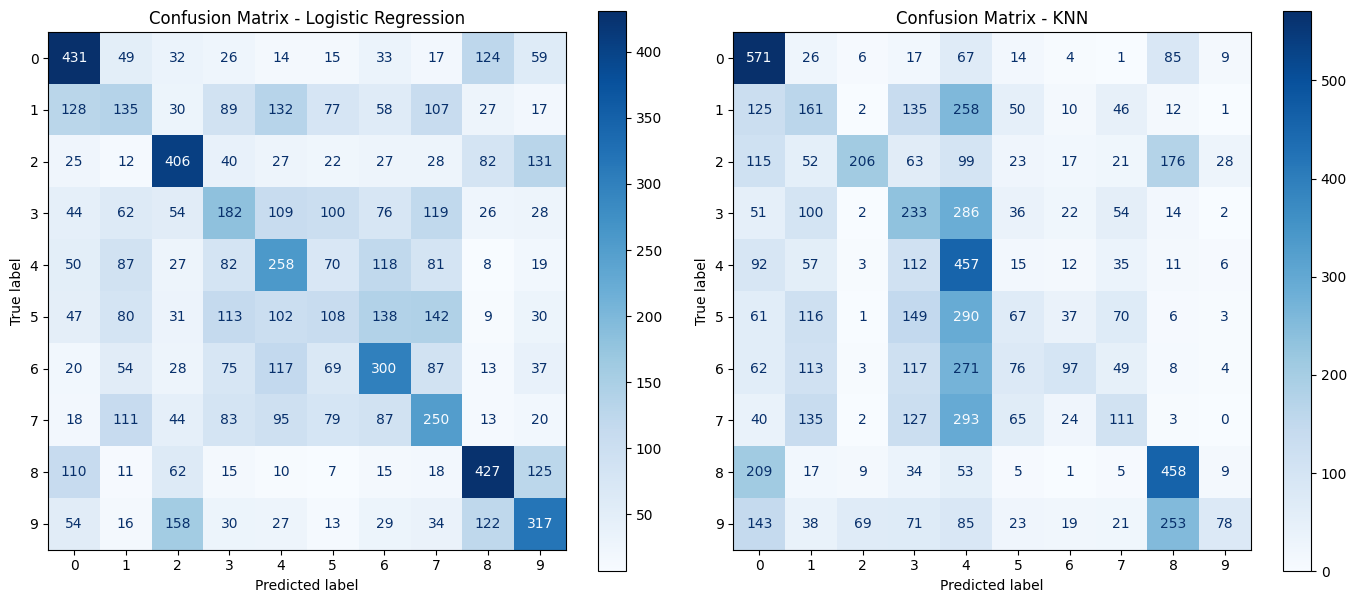

In [10]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_knn = confusion_matrix(y_test, y_pred_knn)


fig, ax = plt.subplots(1, 2, figsize=(14, 6))


disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=np.unique(y_test))
disp_log_reg.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title('Confusion Matrix - Logistic Regression')


disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(y_test))
disp_knn.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title('Confusion Matrix - KNN')

plt.tight_layout()
plt.show()

#  Precision-Recall Curve

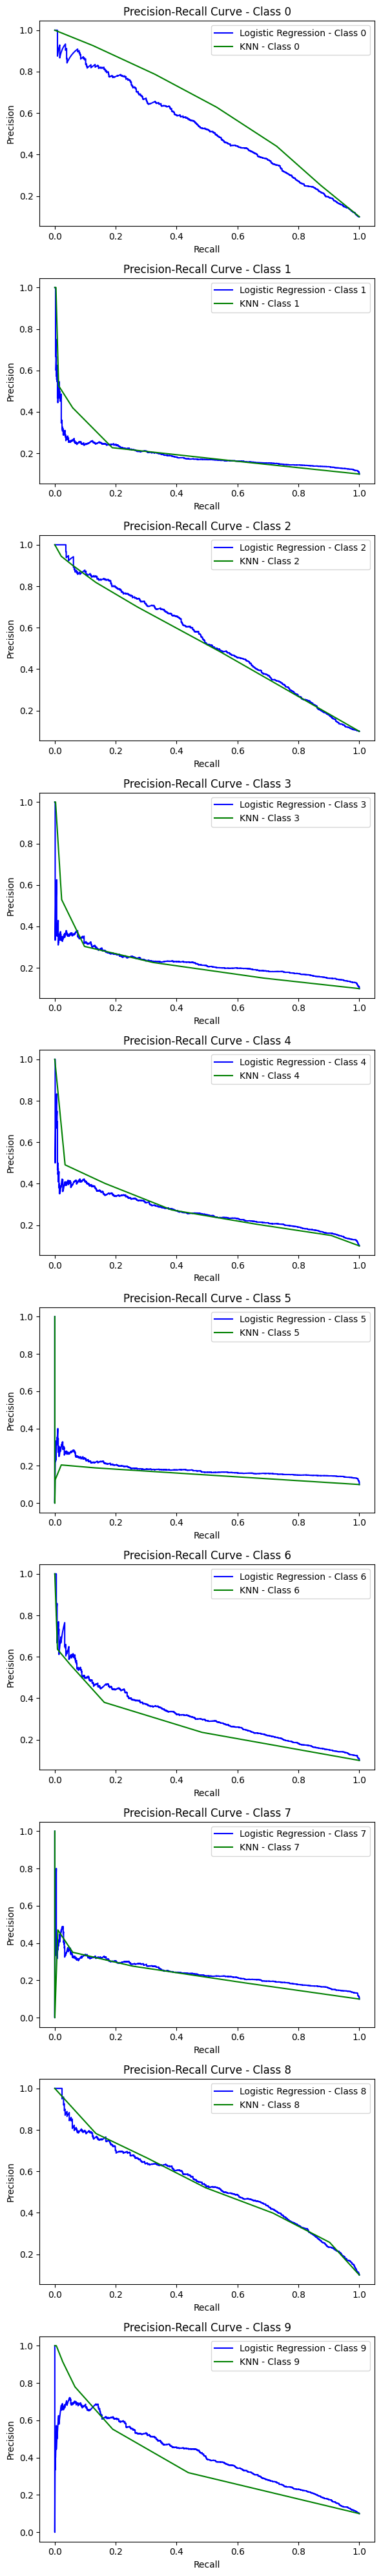

In [11]:
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


y_proba_log_reg = log_reg.predict_proba(X_test_scaled)


y_proba_knn = knn.predict_proba(X_test_scaled)


precision_log_reg, recall_log_reg = {}, {}
precision_knn, recall_knn = {}, {}
fpr_log_reg, tpr_log_reg = {}, {}
fpr_knn, tpr_knn = {}, {}

# Compute Precision-Recall Curve and ROC Curve for each class
for i in range(y_train_bin.shape[1]):
    precision_log_reg[i], recall_log_reg[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba_log_reg[:, i])
    precision_knn[i], recall_knn[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba_knn[:, i])

    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_bin[:, i], y_proba_log_reg[:, i])
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_proba_knn[:, i])

# Plot Precision-Recall Curves for each class
num_classes = y_train_bin.shape[1]
fig, axes = plt.subplots(num_classes, 1, figsize=(6, 4 * num_classes))

for i in range(num_classes):
    axes[i].plot(recall_log_reg[i], precision_log_reg[i], color='blue', label=f'Logistic Regression - Class {i}')
    axes[i].plot(recall_knn[i], precision_knn[i], color='green', label=f'KNN - Class {i}')
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(f'Precision-Recall Curve - Class {i}')
    axes[i].legend()

plt.tight_layout()
plt.show()




In [12]:
avg_precision_log_reg = {}
avg_precision_knn = {}

for i in range(y_train_bin.shape[1]):
    avg_precision_log_reg[i] = average_precision_score(y_test_bin[:, i], y_proba_log_reg[:, i])  
    avg_precision_knn[i] = average_precision_score(y_test_bin[:, i], y_proba_knn[:, i])  


mean_avg_precision_log_reg = np.mean(list(avg_precision_log_reg.values()))
mean_avg_precision_knn = np.mean(list(avg_precision_knn.values()))

print(f"Average Precision for Logistic Regression: {mean_avg_precision_log_reg:.2f}")
print(f"Average Precision for KNN: {mean_avg_precision_knn:.2f}")


if mean_avg_precision_log_reg > mean_avg_precision_knn:
    best_model_precision = "Logistic Regression"
else:
    best_model_precision = "KNN"

print(f"The better model based on Precision-Recall is: {best_model_precision}")


Average Precision for Logistic Regression: 0.34
Average Precision for KNN: 0.27
The better model based on Precision-Recall is: Logistic Regression


# AUC Curve

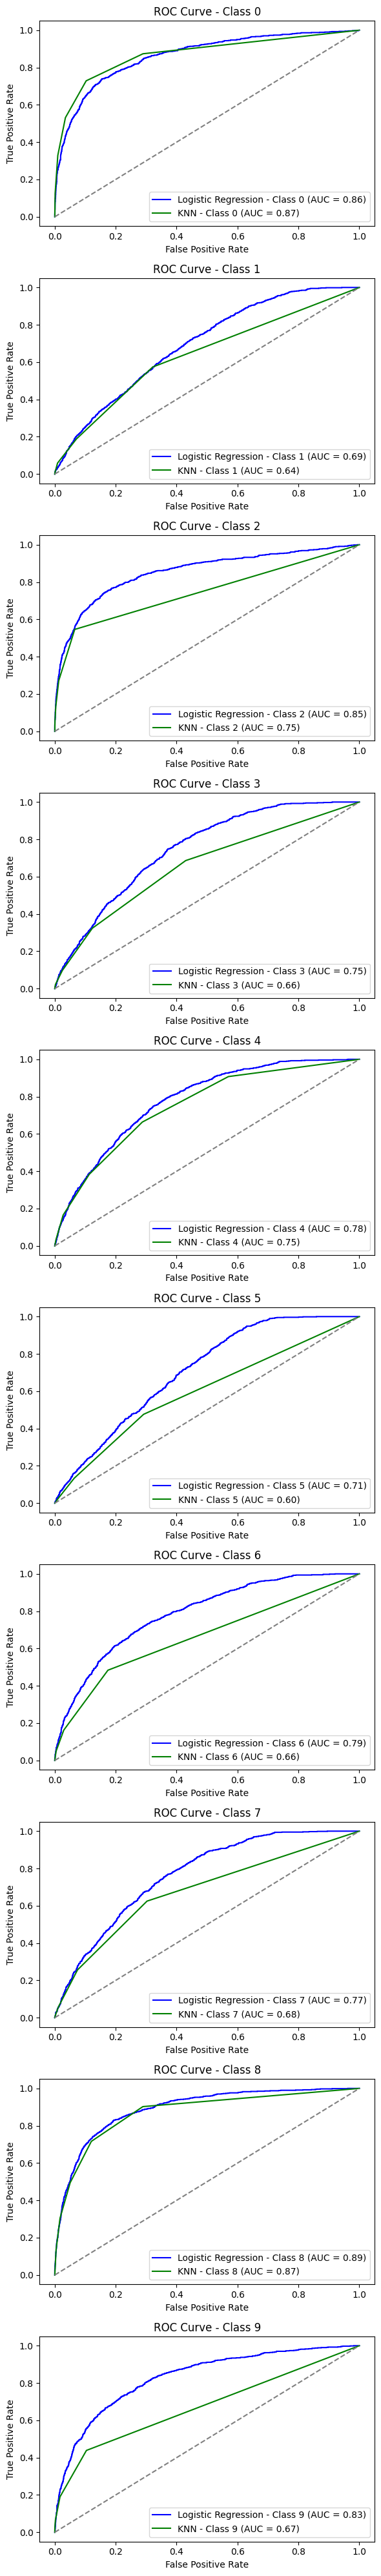

In [13]:
fig, axes = plt.subplots(num_classes, 1, figsize=(6, 4 * num_classes))

for i in range(num_classes):
    axes[i].plot(fpr_log_reg[i], tpr_log_reg[i], color='blue', label=f'Logistic Regression - Class {i} (AUC = {auc(fpr_log_reg[i], tpr_log_reg[i]):.2f})')
    axes[i].plot(fpr_knn[i], tpr_knn[i], color='green', label=f'KNN - Class {i} (AUC = {auc(fpr_knn[i], tpr_knn[i]):.2f})')
    axes[i].plot([0, 1], [0, 1], color='gray', linestyle='--')  
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - Class {i}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [14]:
auc_log_reg = {}
auc_knn = {}

for i in range(y_train_bin.shape[1]):
    auc_log_reg[i] = auc(fpr_log_reg[i], tpr_log_reg[i])  # AUC for Logistic Regression
    auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])  # AUC for KNN


avg_auc_log_reg = np.mean(list(auc_log_reg.values()))
avg_auc_knn = np.mean(list(auc_knn.values()))

print(f"Average AUC for Logistic Regression: {avg_auc_log_reg:.2f}")
print(f"Average AUC for KNN: {avg_auc_knn:.2f}")


if avg_auc_log_reg > avg_auc_knn:
    best_model = "Logistic Regression"
else:
    best_model = "KNN"

print(f"The better model based on AUC is: {best_model}")


Average AUC for Logistic Regression: 0.79
Average AUC for KNN: 0.71
The better model based on AUC is: Logistic Regression
